# Mask a variable on pressure levels where data are below surface

This tutorial shows how to mask data

In some case earth system model output are interpolated to som standard pressure levels, this can lead to data being generated bellow the ground

This tutorial shows how to mask these erroneous data.

© Software was developed by Charles Doutriaux and CDAT team, and tutorial was written by Charles Dutriaux. (14 Mar. 2018)

Data courtesy of Jerry Potter



## Contents: 
([Top](#top))
- [Prepare Notebook](#nb)
- [Load data](#load)
- [Regrid](#regrid)
- [Mask data below surface](#mask)
- [Plot results](#plot)

## Prepare Notebook<a id='nb'></a>

In [1]:
from __future__ import print_function
import cdms2
import numpy
import vcs
import requests
import os

for filename in ['ps.nc','ta.nc']:
    if not os.path.exists(filename):
        r = requests.get("https://cdat.llnl.gov/cdat/sample_data/notebooks/{}".format(filename), stream=True)
        with open(filename,"wb") as f:
            for chunk in r.iter_content(chunk_size=1024):
                if chunk:  # filter local_filename keep-alive new chunks
                    f.write(chunk)


## Load the data<a id='load'></a>

In [2]:
PS_file = cdms2.open("ps.nc")
TA_file = cdms2.open("ta.nc")

ps = PS_file("ps")
ta = TA_file("ta")

print("Shaped: ps {} and ta {}".format(ps.shape,ta.shape))

Shaped: ps (1, 320, 640) and ta (1, 37, 145, 288)


## Regrid surface pressure data to target grid<a id='regrid'></a>

In [3]:
ps = ps.regrid(ta.getGrid())
print("ps new shape:",ps.shape)

/home/doutriaux1/anaconda2/envs/nightly-mesa/lib/python2.7/site-packages/cdms2/avariable.py:1146: Warning: 
avariable.regrid: We chose regridTool = esmf for you among the following choices:
   Tools ->    'regrid2' (old behavior)
               'esmf' (conserve, patch, linear) or
               'libcf' (linear)
  warnings.warn(message, Warning)
/home/doutriaux1/anaconda2/envs/nightly-mesa/lib/python2.7/site-packages/cdms2/avariable.py:1153: Warning: 
avariable.regrid: We chose regridMethod = linear for you among the following choices:
    'conserve' or 'linear' or 'patch'
  warnings.warn(message, Warning)


ps new shape: (1, 145, 288)


## Mask Data Below Surface<a id='mask'></a>

In [4]:
# Loop through levels and mask where pressure is less than ps

levels = ta.getLevel()
print("Levels are:", levels[:])
for i,level in enumerate(levels):
    low = numpy.less(ps,level)
    ta[:,i] = numpy.ma.masked_where(low,ta[:,i])

Levels are: [ 100000.   97500.   95000.   92500.   90000.   87500.   85000.   82500.
   80000.   77500.   75000.   70000.   65000.   60000.   55000.   50000.
   45000.   40000.   35000.   30000.   25000.   22500.   20000.   17500.
   15000.   12500.   10000.    7000.    5000.    3000.    2000.    1000.
     700.     500.     300.     200.     100.]


## Plot Data<a id='plot'></a>

/home/doutriaux1/anaconda2/envs/nightly-mesa/lib/python2.7/site-packages/vcs/VTKPlots.py:1012: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  data[:] = numpy.ma.masked_invalid(data, numpy.nan)


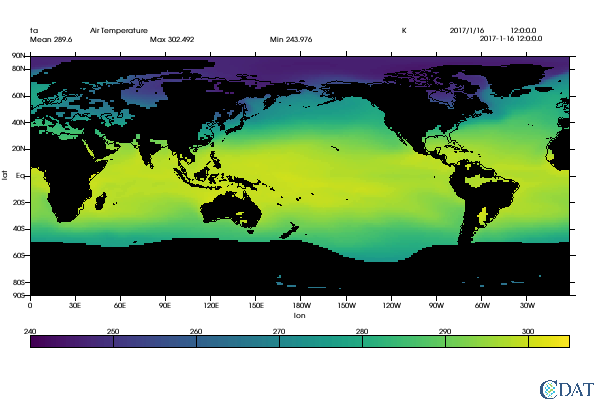

In [5]:
x = vcs.init(bg=True,geometry=(600,400))
x.plot(ta[:,0])